# BISI CST2101 Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Q1: Import the necessary libraries and briefly explain the use of each library (1 Mark)

In [1]:
# remove _____ & write the appropriate library name

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You don't have to explain about these libraries below
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Write your Answer here: 

**Ans 1:** 

Numpy: It is a library which is used for dealing with Arrays.

Pandas:This library is basically used for data analysis.It is basically used to deal with the dataFrames.
       
matplotlib.pyplot as plt: It is a data visualization library used for creating interactive graphs.It uses the Pandas and        Numpy as the basic libraries to plot the various  graphs.
       
Seaborn:This is a data visualization library used in python.It is basically the enhanced version of the  Matplotlib with        the NumPy and Pandas.
       
-- The only difference between the Matplotlib and Seaborn is that Matlplotlib is used for constructing basic graphs               whereas the Seaborn is used for making Complex and advanced graphs.
       
-- Also, the matplotlib uses lengthy syntax whereas the syntax for seaborn is comparatively small.
      
        

### Q2: Read the given dataset (1 Mark)

In [2]:
#remove _____ & write the appropriate function name

pima = pd.read_csv("diabetes.csv")

### Q3. Show the last 5 records of the dataset (1 Mark)

In [3]:
#remove ______ and write the appropriate number in the function

pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
995,2,173,79,32,474,35.504233,0.402867,21,1
996,13,132,70,30,111,35.271769,0.168845,42,1
997,3,132,87,44,156,34.794755,0.765003,29,1
998,0,140,0,0,0,41.926693,0.209833,28,1
999,4,93,59,35,93,45.914499,0.737636,29,1


### Q4. Show the first 5 records of the dataset (1 Mark)

In [4]:
#remove _____ & write the appropriate function name and the number of rows to get in the output

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q5. Find the dimension of the `pima` dataframe. What do you understand by the dimension of the dataset? (1 Mark)

In [5]:
#remove _____ & write the appropriate function name

pima.shape

(1000, 9)

#### Write your Answer here: 


**Ans 5:**

Dimensions of the dataset refers to the number of the Rows and Columns in a dataset.
The columns are also referred as 'Features'.
The number of the 'Rows' refers to the total number of the observations in the data. 

### Q6. Find the size of the `pima` dataframe. (1 Mark)

In [6]:
#remove _____ & write the appropriate function name

pima.size

9000

#### Write your Answer here: 


**Ans 6:** 

Therefore, the total number of elements in the dataframe are 9000.i.e, the product of total number of rows times the total number of columns. 

### Q7. Display the data types of all the variables in the data set? (1 Mark)


In [7]:
#remove _____ & write the appropriate function name

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Q8. Are there any missing values in the `pima` dataframe?  Which variables have missing values? (1 Mark)

In [8]:
#remove _____ & write the appropriate function name

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Write your Answer here: 


**Ans 8:** 

No, since all the Features displays 0, hence it can be concluded that there are no missing values.

### Q9. Find the summary statistics for all variables except for  `'Outcome'` variable? Choose any one column/variable and explain all the statistical measures. (2 Marks)

In [9]:
#remove _____ & write the appropriate function name

pima.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090,33.830000
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158,11.268189
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750,25.000000
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500,30.000000
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500,41.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### Write your Answer here: 


**Ans 9:**  'Skin-Thickness'

   - Count:From here, it is observed that the 'Skin-thickness' has the 1000 data values in a row.
     
   - Mean:The mean 'SkinThickness' value is 20.755
     
   - Std :The standard deviation from the mean SkinThickness is 16.08.It means the SkinThickness can have deviation of16.08          units from the mean value.  
     
   - Min : The minimum value for the SkinThickness is observed to be 0.
     
   - 25% : The 25% of values the 0 values.Also,it means that the all the values in the First-Quartile are 0.
     
   - 50% : It means that the Median value of the SkinThickness variable is 24.Also, it is considered as the Second-Quartile.It              means that  50% of the values are either equal to or less than the 24.
     
   - 75% : This means that the 75% of the values for SkinThickness are either equal to or are less than the value of 33.
     
   - Max : The maximum value for the SkinThickness is 99.

### Q10. Plot the distribution plot for the variable `'BloodPressure'`. Write your observations from the plot. (2 Marks)

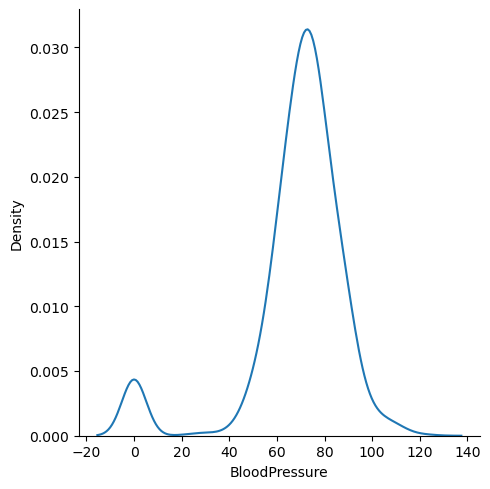

In [10]:
#remove _____ & write the appropriate library name

sns.displot(pima['BloodPressure'], kind='kde')

plt.show()

#### Write your Answer here: 


**Ans 10:**

From here, it can be concluded that the most of the people have the blood pressure in the range of the (60-80)mm Hg.Also, it seems that the BloodPressure distribution is normal .

Further, there is a small amount of skewness to the right, thus giving information that there can be some outliers in the dataset, which should be analysed.

There's also a second bump at the 0 mm Hg, which means there's some error in data, since its not possible biologically to have 0 BloodPressure.



### Q11. What is the `'BMI'` for the person having the highest `'Glucose'`? (1 Mark)

In [11]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

#### Write your Answer here: 


**Ans 11**

The BMI for the person having the highest glucose is 42.9, with the row number of 661.

### Q12.
#### 12.1 What is the mean of the variable `'BMI'`? 
#### 12.2 What is the median of the variable `'BMI'`? 
#### 12.3 What is the mode of the variable `'BMI'`?
#### 12.4 Are the three measures of central tendency equal?

### (2 Marks)

In [12]:
#remove _____ & write the appropriate function name

m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

32.664772391408796
32.8
32.0


#### Write your Answer here: 


Ans 12.1: 'Mean' of the variable 'BMI' is 32.664772391408796

Ans 12.2: 'Median' of the variable 'BMI' is 32.8

Ans 12.3: 'Mode' of the variable 'BMI' is 32.0

Ans 12.4: No, the three measures are not equal.

### Q13. How many women's `'Glucose'` level is above the mean level of `'Glucose'`? (1 Mark)

In [13]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

449

#### Write your Answer here: 


 **Ans 13:** 
 
 So, there are 449 Women's whose Glucose level is greater than the mean glucose value,which is 125.21600.

### Q14. Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`. Write you observations from the plot. (2 Marks)

In [14]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665,0.226540
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567,0.472265
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416,0.043412
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236,0.068185
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887,0.121966
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921,0.312252
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809,0.199864
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000,0.234405
Outcome,0.226540,0.472265,0.043412,0.068185,0.121966,0.312252,0.199864,0.234405,1.000000


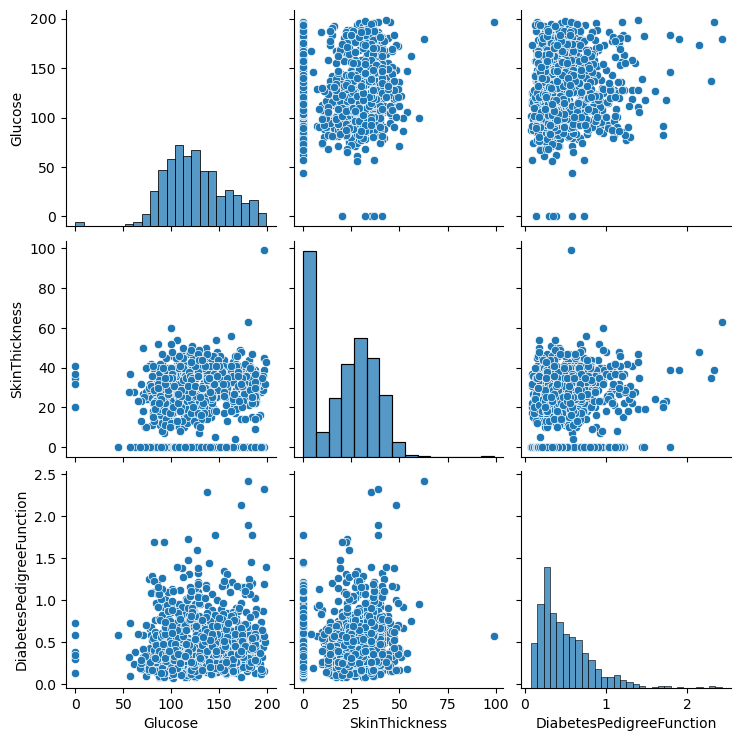

In [15]:
#remove _____ & write the appropriate function and argument names

sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'])
plt.show()

#### Write your Answer here: 


**Ans 14:**  It can be observed that :

   A. There exists some postitve correlation between the 'Glucose' and the 'Diabetes-Pedigree function'' variable since, the           higher amount of glucose values are   related to higher 'Diabetes-Pedigree function'.However, no relation is observed              between Glucose and Skinthickness.
         
   B. No prominent relationship between the 'skinThickness' and the other variables'Glucose' and                                       'DiabetesPedigreeFunction'.
         
   C. Similarly, no strong correlation between the 'DiabetesPedigreeFunction' and 'SkinThickness'.
         
   D. Also, it can be observed that the distribution for 'DiabetesPedigreeFunction' and 'SkinThickness' is 'right-skewed' and the distribution for 'Glucose' is somwhat Normally distributed.

### Q15. Plot the scatterplot between `'Glucose'` and `'Insulin'`. Write your observations from the plot. (1 Mark)

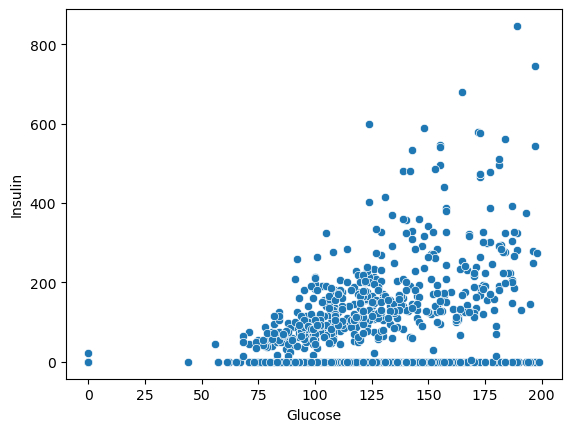

In [16]:
#remove _____ & write the appropriate function name

sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

#### Write your Answer here: 


**Ans 15:** 
   - Here, it can be said that there is some positive correlation between the variables 'Glucose'and 'Insulin', since as the          value of Glucose increases the insulin rises and vice-versa.
      
   - It seems that there is some Linear Relationship,but is not quite strong.Therefore, more investigation needs  to be               done.         

### Q16. Plot the boxplot for the 'Age' variable. Are there outliers? (1 Mark)

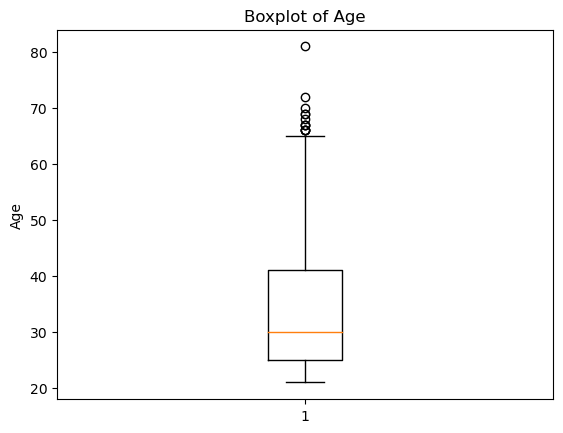

Outliers: 123    69
221    66
363    67
453    72
459    81
489    67
495    66
537    67
552    66
666    70
674    68
684    69
759    66
Name: Age, dtype: int64


13

In [17]:
#remove _____ & write the appropriate function and column name 

plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

import numpy as np

age = pima['Age']
Q1 = np.percentile(age, 25)
Q3 = np.percentile(age, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = age[(age < lower_bound) | (age > upper_bound)]
print('Outliers:', outliers)
outliers.value_counts().sum()

#### Write your Answer here: 


**Ans 16**:

Yes, the variable 'Age'  do have outliers.In total, there are **13** Outliers.These are calculated, by first obtaining the **IQR(InterQuartile Range)** and then calculating the Lower bound and the Upper Bound limits, and then identifying the number of outliers out of these limits.

### Q17. Find and visualize the the correlation matrix. Write your observations from the plot. (1 Mark)

In [18]:
#remove _____ & write the appropriate function name and run the code

corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000


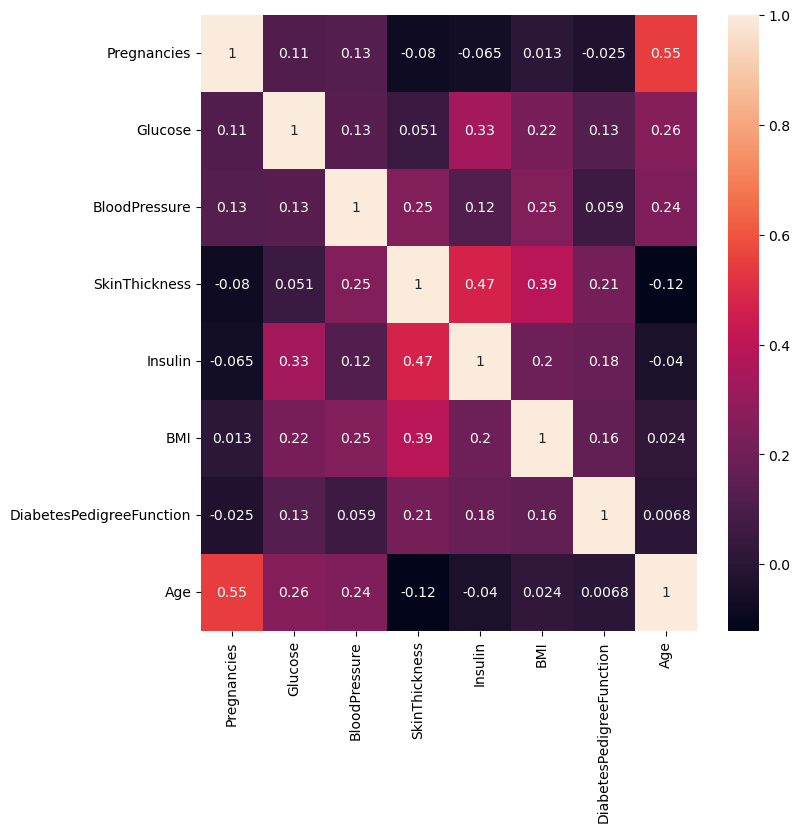

In [19]:
#remove _____ & write the appropriate function name

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

#### Write your Answer here: 


**Ans 17:** 

From here , it can be said that:

- 'Age' and the 'Pregnancies' are the two features having positive correlation.

- 'skinThickness' and 'Insulin' also presented positive correlation.

- 'skinThickness' and'BMI' also has postitve correlation.


        
 However, these correlations are not so strong enough hence, No multi-collinearity is exhibited here.

## Model Training

### Q18. Split and scale the data (2 Mark)

In [20]:
# Split the data into dependent and independent variables
# remove _____ & write the appropriate function variable name
y = pima['Outcome']
x = pima.drop('Outcome', axis = 1)

In [21]:
# Using StandarScaler scale the data
# remove _____ & write the appropriate function function name

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [22]:
# Splitting the data into train and test. Use test size as 15%
# remove _____ & complete the code

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, stratify=y,  random_state = 45)

### Q19. Train a Logistic Regression Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [23]:
# remove _____ & complete the code

# import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression()

# fit the model on the train set
m = lr.fit(x_train,y_train)

# Predict on x_test
y_pred = m.predict(x_test)

# Evaluate the model
print('Accuracy of Logistic Regression model on the train set: {:.2f}'.format(m.score(x_train, y_train)))
print('Accuracy of the Logictic Regression model on the test set: {:.2f}'.format(m.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Print true positives and true negatives
print('True positives: {}'.format(tp))
print('True negatives: {}'.format(tn))
print('false positives: {}'.format(fp))
print('false negatives: {}'.format(fn))

cm1 = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm1)




Accuracy of Logistic Regression model on the train set: 0.76
Accuracy of the Logictic Regression model on the test set: 0.76
True positives: 51
True negatives: 63
false positives: 12
false negatives: 24
Confusion matrix:
 [[63 12]
 [24 51]]


C:\Users\Simra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Write your Answer here: 


**Ans 19:** 

   So, the number of TP's  are =51
   
   And, the number of TN's are= 63
        
 - Precision =TP/(TP+FP)= 51 / (51+12) = 0.80
       
 -  Recall = TP/(TP+FN)=51 / (51+24) =0.68 
        
 -  F1 Score = 2*(Precision * Recall) / (Precision + Recall) = 0.74

### Q20. Train a Random Forest Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [24]:
#remove _____ & complete the code

# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))

#confusion_matrix(y_test, y_pred2)

tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred2).ravel()
# Print true positives and true negatives
print('True positives: {}'.format(tp1))
print('True negatives: {}'.format(tn1))
print('false positives: {}'.format(fp1))
print('false negatives: {}'.format(fn1))

cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion matrix:\n', cm2)

Accuracy of Random Forest model on the train set: 0.82
Accuracy of Random Forest model on the test set: 0.77
True positives: 60
True negatives: 56
false positives: 19
false negatives: 15
Confusion matrix:
 [[56 19]
 [15 60]]


#### Write your Answer here: 

**Ans 20:** 

So, the number of TP's are= 60.

And , the number of TN's are 56.

   - Precision =TP/(TP+FP)= 60 / (60+19) = 0.76
   
   - Recall =TP/(TP+FN)= 60 / (60+15) = 0.80
   
   - F1 Score = 2*(Precision * Recall) / (Precision + Recall) = 0.78

### Q21. Which model performed better? (1 Mark)

#### Write your Answer here: 

**Ans 21:**

Random Forest has higher accuracy on both train and test dataset.

Also,the Recall scores also high in case of Random forest when compared with the Logistic Regression.

F1 scores for RandomForest model is also higher. 

However, the Precision scores are slightly higher for the Logistic regression.

Overall, it can be concluded that the RandomForest Performed better.